### Example 1

Solve the following route problem using genetic algorithms
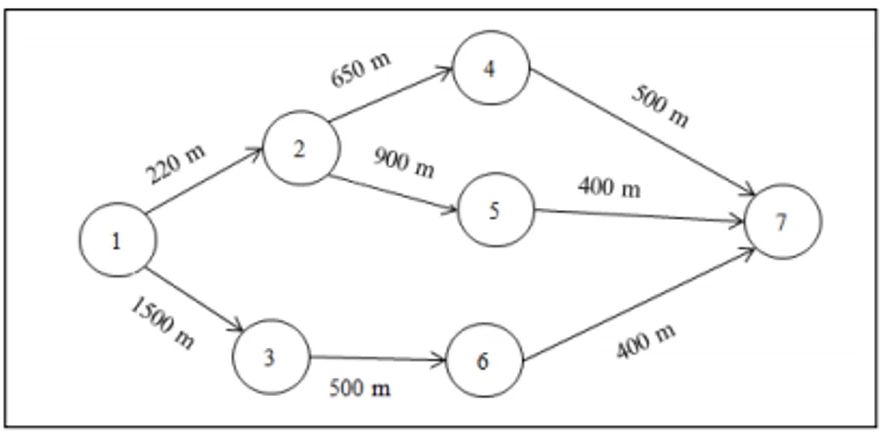

$$
\begin{alignat*}{3}
\text{min  }  & \sum_{(i, j)} x_{i,j}D_{i,j} && \\
\text{subject to  }
& \sum_{j \in \Omega_{origin}^{out}} x_{origin, j} = 1\\
& \sum_{i \in \Omega_{dest}^{in}} x_{i, dest} = 1\\
& \sum_{j \in \Omega_{i}^{out}} x_{i, j} = \sum_{j \in \Omega_{i}^{in}} x_{j, i} 
&& \qquad \forall i \not {{origin, dest}}\\
\end{alignat*}
$$


In [8]:
import pandas as pd, numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga

In [9]:
nodes = pd.read_excel('route_inputs.xlsx', sheet_name='nodes')
paths = pd.read_excel('route_inputs.xlsx', sheet_name='paths')
nVars = len(paths)

In [10]:
# Model 

def f(x):
    pen = 0

    # Constraint 1
    node_origin = int(nodes.node[nodes.description=='origin'])
    sum_cons1 = sum([x[p] for p in paths.index[paths.node_from == node_origin]])
    if sum_cons1 != 1:
        pen += 500000 + 1000*np.abs(sum_cons1 - 1)
    
    # Constraint 2
    node_destination = int(nodes.node[nodes.description=='destination'])
    sum_cons2 = sum([x[p] for p in paths.index[paths.node_from == node_destination]])
    if sum_cons2 != 1:
        pen += 500000 + 1000*np.abs(sum_cons2 - 1)
    
    # Constraint 3
    for node in nodes.node[nodes.description=='middle point']:
        sum_in = sum([x[p] for p in paths.index[paths.node_to==node]])
        sum_out = sum([x[p] for p in paths.index[paths.node_from==node]])
        if sum_in != sum_out:
            pen += 500000 + 1000*np.abs(sum_out - sum_in)
    
    # Objective function
    objFun = sum([x[p] * paths.distance[p] for p in paths.index])
    return objFun + pen

c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\geneticalgorithm2\geneticalgorithm2.py:179: UserWarning: argument variable_type_mixed is deprecated and will be removed at version 7
 use variable_type=('int', 'int', 'int', 'int', 'int', 'int', 'int', 'int') instead
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\geneticalgorithm2\geneticalgorithm2.py:195: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(



Set: Average time of function evaluating (secs): 0.00224473237991333 (total = 0.224473237991333)

Best score before optimization: 502520.0
                                                                                                                                                                                                        
 The best found solution:
 [1. 0. 1. 0. 1. 0. 0. 0.]

 Objective function:
 502370.0

 Used generations: 104
 Used time: 10.9 seconds


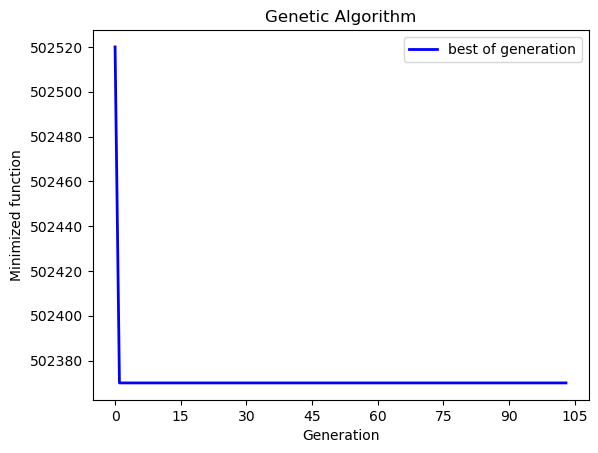

GAResult(last_generation=Generation(variables=array([[1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1.,

In [11]:
#bounds and var type
varbounds = np.array([[0,1]]*nVars)
vartype = np.array(['int']*nVars)

#GA parameters
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':100,\
                   'mutation_probability':0.40,\
                   'elit_ratio': 0.20,\
                   'crossover_probability': 0.50,\
                   'parents_portion': 0.40,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':100}

#Solve
model = ga(function=f,
           dimension=nVars,
           variable_type_mixed=vartype,
           variable_boundaries=varbounds,
           algorithm_parameters=algorithm_param)

model.run()

In [12]:
#print
x = model.result.variable
paths['activated'] = 0
for p in paths.index:
    paths.activated[p] = x[p]

print('\n\nAll Paths:')
print(paths)

print('\nSelected Paths:')
print(paths[paths.activated==1])
print('\nTotal path:', sum(paths.distance[paths.activated==1]))




All Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
1          1        3      1500          0
2          2        4       650          1
3          2        5       900          0
4          4        7       500          1
5          5        7       400          0
6          3        6       500          0
7          6        7       400          0

Selected Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
2          2        4       650          1
4          4        7       500          1

Total path: 1370
